In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

In [2]:
Nbig = int(2**16)
err = 1e-6

beta = 500.
mu = 0.0
J = 1.

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

$$G(i\omega_n) = \frac{1}{i\omega_n + \mu -\Sigma(\omega_n)}$$
$$ \Sigma(\tau) = -J^2 G^2(\tau)G(-\tau)$$

In [3]:
Gtau = -0.5*np.ones(Nbig) 
''' It's crucial to start with this, even changing the sign here is enough to make the solution 
fall into an unwanted one'''

itern = 0
diff = 1.
x = 0.5

while(diff>err):
    itern+=1
    diffold = diff
    
    oldGtau = 1.0*Gtau
    oldGomega = Time2FreqF(oldGtau,Nbig,beta)
    
    Sigmatau = J**2 * Gtau**2 * Gtau[::-1] #KMS G(-tau) = -G(beta-tau)
    #Sigmatau = J**2 * Gtau**3
    Sigmaomega = Time2FreqF(Sigmatau,Nbig,beta)
    
    Gomega = x*(1./(1j*omega + mu - Sigmaomega)) + (1-x)*oldGomega
    #Gtau = Freq2TimeF(Gomega - (1/(1j*omega)),Nbig,beta) - 0.5 #cool trick for Gibbs oscillations
    Gtau = Freq2TimeF(Gomega,Nbig,beta)
    
    diff = (1.0/Nbig) * np. sqrt(np.sum((np.abs(Gtau-oldGtau))**2))
    if diff>diffold:
        x/=2


Q = 0.5*(Gtau[0] - Gtau[-1])
print("itern = ",itern," , diff = ", diff)
print("Q = ", np.real(Q))

itern =  9  , diff =  6.620384706756945e-07
Q =  1.3877787807814457e-16


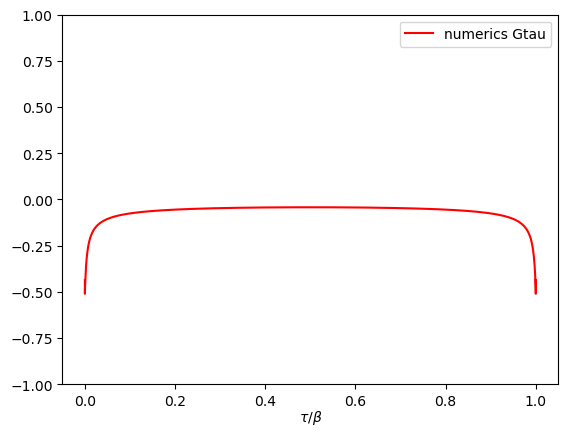

In [4]:
plt.plot(tau/beta, np.real(Gtau), 'r', label = 'numerics Gtau')
#plt.plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
plt.ylim(-1,1)
plt.xlabel(r'$\tau/\beta$',labelpad = 0)
plt.legend()

(-5.0, 5.0)

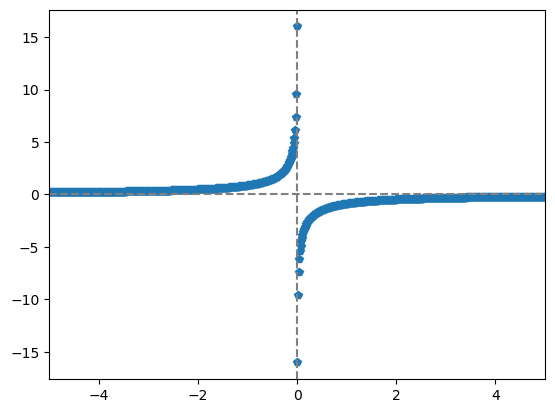

In [5]:
plt.plot(omega,np.imag(Gomega),'p')
plt.plot(omega,np.zeros_like(omega), color = 'gray', linestyle = '--')
plt.axvline(0,color='gray',linestyle = '--')
plt.xlim(-5,5)

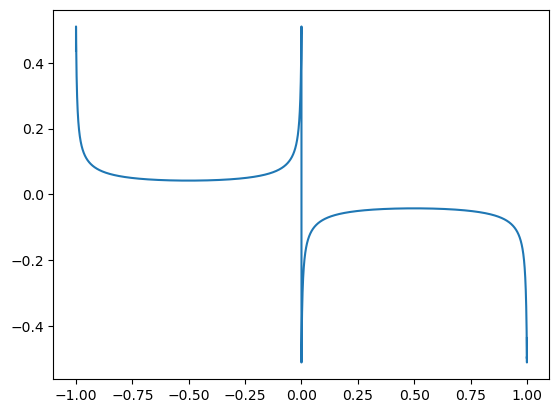

In [6]:
doubledtau = np.array([-1*tau[::-1]] + [tau]).flatten()
doubledG = np.real(np.array([-1*Gtau] + [Gtau]).flatten())
plt.plot(doubledtau/beta,doubledG)

In [7]:
A = np.array([1,2,3,4,5])
np.array([-1*A[::-1]]+ [A]).flatten()

array([-5, -4, -3, -2, -1,  1,  2,  3,  4,  5])

In [8]:
tau[::-1][0], beta

(499.9961853027344, 500.0)

In [9]:
val = 10
-tau[::-1][val],beta - tau[val]
np.real(Gtau[::-1][val]), np.real(Gtau[val])

(-0.4870842335907861, -0.48708423359078606)

### Let's check if we've actually found a solution
Looks like we did 

In [10]:
print((1/Nbig) * np.sum(np.abs(Gomega - 1./(1j*omega + mu - Sigmaomega))**2))
print(np.allclose(Sigmatau , (J**2 * Gtau**2 * Gtau[::-1])))

1.0957373416363577e-07
False


In [11]:
2**17 > 1e5

True